# Prosper Loans Data Exploration
## by (Osazemen Marvins Oriakhi)

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Let's load in the dataset


In [2]:
df = pd.read_csv('prosperLoanData (1).csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#lets get the number of rows and columns of the data set
df.shape

(113937, 81)

In [5]:
# use the info() function to get more information for each column of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

I want to create a new dataset (new_df) with selected number of columns of interest

In [6]:
new_df = df[['LoanStatus', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore',
       'BorrowerRate', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'BorrowerAPR','LoanOriginalAmount','MonthlyLoanPayment','OnTimeProsperPayments', 'TotalProsperLoans']].copy()

In [7]:
# lets view the first five rows of the new data
new_df.head()

,LoanStatus,LenderYield,ProsperRating (numeric),ProsperScore,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment,OnTimeProsperPayments,TotalProsperLoans
0,Completed,0.1380,NaN,NaN,0.1580,Self-employed,True,0.16516,9425,330.43,NaN,NaN
1,Current,0.0820,6.0,7.0,0.0920,Employed,False,0.12016,10000,318.93,NaN,NaN
2,Completed,0.2400,NaN,NaN,0.2750,Not available,False,0.28269,3001,123.32,NaN,NaN
3,Current,0.0874,6.0,9.0,0.0974,Employed,True,0.12528,10000,321.45,NaN,NaN
4,Current,0.1985,3.0,4.0,0.2085,Employed,True,0.24614,15000,563.97,11.0,1.0


In [8]:
# for more information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanStatus               113937 non-null  object 
 1   LenderYield              113937 non-null  float64
 2   ProsperRating (numeric)  84853 non-null   float64
 3   ProsperScore             84853 non-null   float64
 4   BorrowerRate             113937 non-null  float64
 5   EmploymentStatus         111682 non-null  object 
 6   IsBorrowerHomeowner      113937 non-null  bool   
 7   BorrowerAPR              113912 non-null  float64
 8   LoanOriginalAmount       113937 non-null  int64  
 9   MonthlyLoanPayment       113937 non-null  float64
 10  OnTimeProsperPayments    22085 non-null   float64
 11  TotalProsperLoans        22085 non-null   float64
dtypes: bool(1), float64(8), int64(1), object(2)
memory usage: 9.7+ MB


In [9]:
#to verify the number of columns
new_df.columns

Index(['LoanStatus', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore',
       'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'OnTimeProsperPayments', 'TotalProsperLoans'],
      dtype='object')

### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns. I later selected 11 columns to work with and renamed it new_df

### What is/are the main feature(s) of interest in your dataset?

> What affects the borrower’s APR

> what factors affect the original loan amount

> What relationship between the lender's yield and prosper score


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the lender yield has an effect on borrower's APR

> I expect that employment status would have an effect on loan original amount


## Univariate Exploration

Let's begin by looking at the distribution of the main variables of interest; borrower's APR, loan status, prosper rating, loan original amount

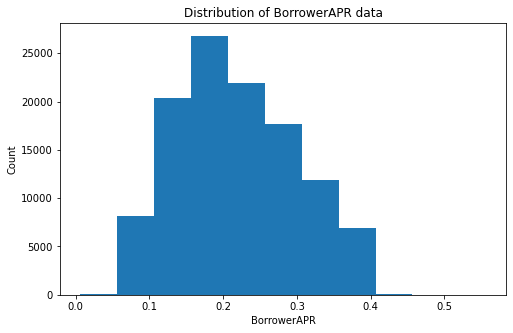

In [52]:
# Let's look at the borrower's APR data
bins = np.arange(new_df['BorrowerAPR'].min(), new_df['BorrowerAPR'].max()+0.05, 0.05) 
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'BorrowerAPR', bins = bins)
plt.title('Distribution of BorrowerAPR data')
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.show();

The data is unimodal with the highest peak between 0.15 and 0.2

In [44]:
#Lets define a function that plots countplots from seaborn library 
def my_countplot(df, xVar, color=sb.color_palette()[-1], order=None, figsize=[14,6]):
    plt.figure(figsize=figsize)
    sb.countplot(data=df, x=xVar, edgecolor='blue', color=color, order=order);
    xVar=xVar.replace('_',' ')
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    plt.ylabel('frequency'.title(), fontsize=10, weight='bold')

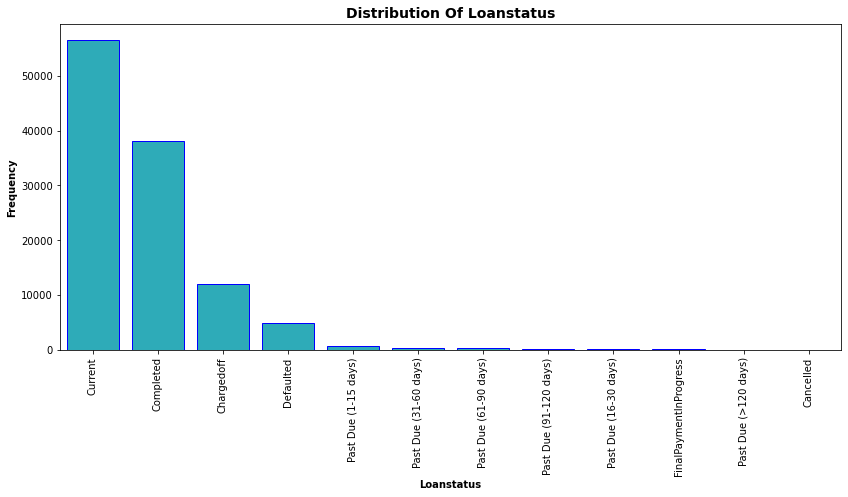

In [38]:
my_countplot(new_df, 'LoanStatus')
plt.xticks(rotation = 90);

Majority of the loans are on the 'current' status, followed by 'completed status' then 'chargeoff' and so on.

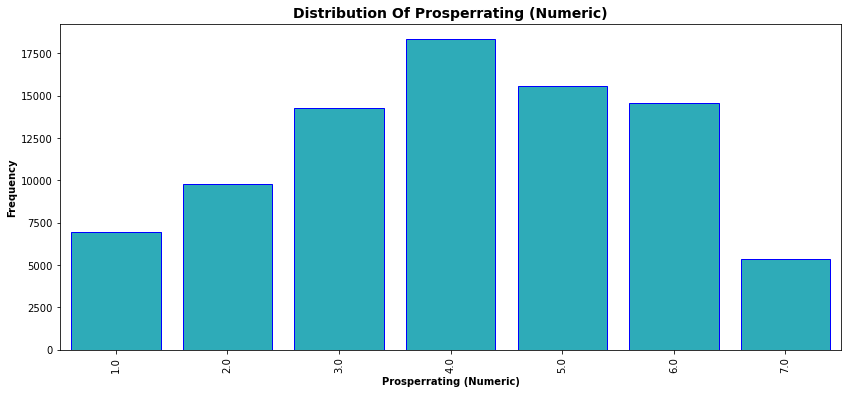

In [39]:
my_countplot(new_df, 'ProsperRating (numeric)')
plt.xticks(rotation = 90);

The prosper rating with the highest count is 4.0 and the lowest is 7.0

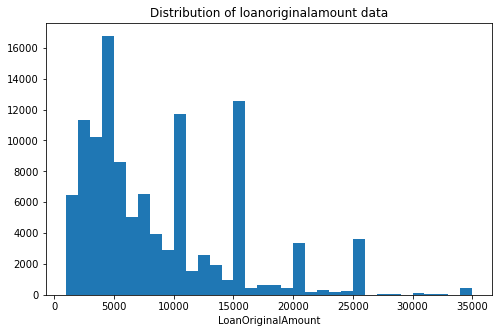

In [53]:
# Let's look at the Loan Original amount data
plt.figure(figsize=[8, 5])
bins = np.arange(new_df['LoanOriginalAmount'].min(), new_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = new_df, x = 'LoanOriginalAmount', bins= bins)
plt.title('Distribution of loanoriginalamount data')
plt.xlabel('LoanOriginalAmount')
plt.show()

With the addition of the bins parameter, it is observed that the loan original amount of 4000 to 5000 had the highest count

Let's look at the lender yield

In [15]:
#lets see the values of the lenderyield column
new_df['LenderYield'].value_counts()

0.3077    3672
0.3400    1916
0.3099    1651
0.2599    1318
0.1450    1011
          ... 
0.1756       1
0.3288       1
0.2331       1
0.1953       1
0.3333       1
Name: LenderYield, Length: 2283, dtype: int64

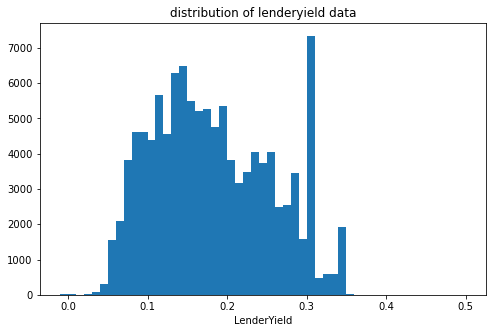

In [54]:
bins = np.arange(new_df['LenderYield'].min(), new_df['LenderYield'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'LenderYield', bins = bins)
plt.title('distribution of lenderyield data')
plt.xlabel('LenderYield')
plt.show();

It is observed that the lender yield between 0.3 and 0.31 had the highest count

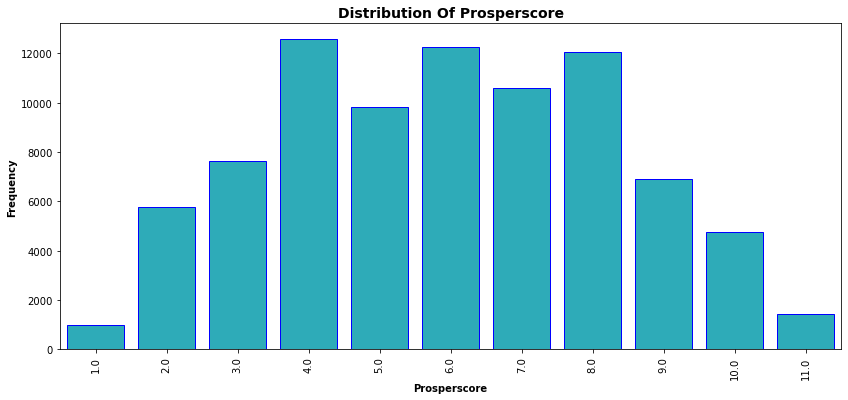

In [40]:
my_countplot(new_df, 'ProsperScore')
plt.xticks(rotation = 90);

It can be observed that the prosper score 4.0 has the highest count followed by 6.0 then 8.0

To look at the other variables;

lets look at employment status

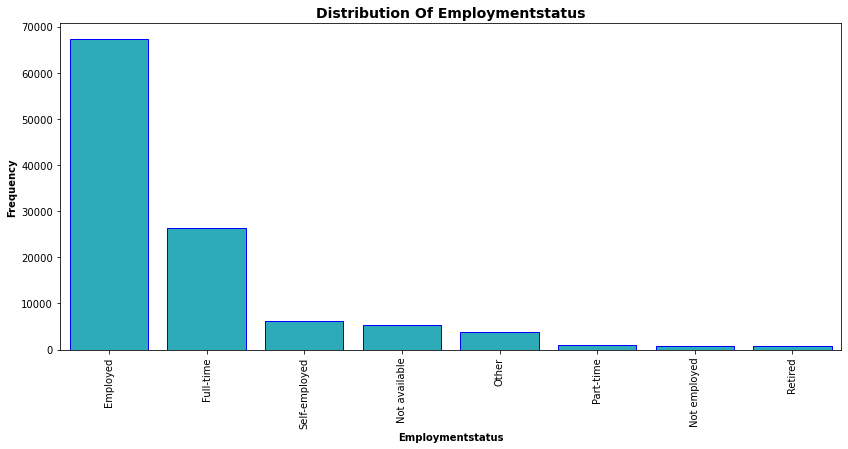

In [41]:
# lets look at employment status data
my_countplot(new_df, 'EmploymentStatus')
plt.xticks(rotation = 90);

It can be observed that the employed status had the highest count of loans than the other status. Even the full time had higher count of loans than the part time

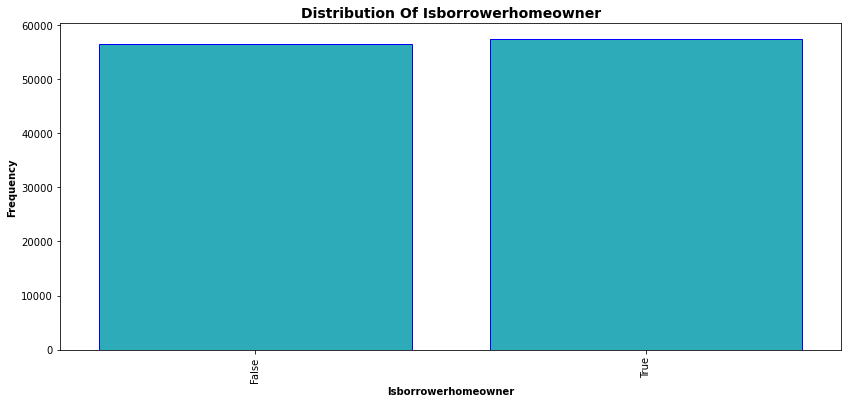

In [42]:
#lets look at IsBorrowerHomeowner column
my_countplot(new_df, 'IsBorrowerHomeowner')
plt.xticks(rotation = 90);

It can be observed from the graph that the home owners borrowed more loans than those that are not home owners

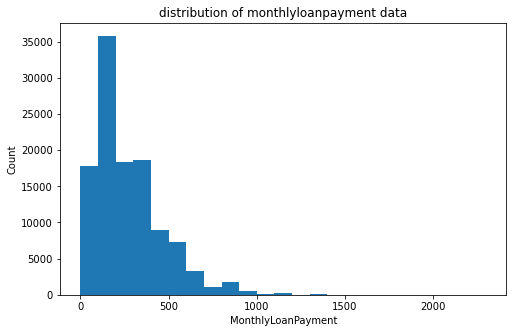

In [55]:
# lets look at monthly loan payments
bins = np.arange(new_df['MonthlyLoanPayment'].min(), new_df['MonthlyLoanPayment'].max()+100, 100) 
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'MonthlyLoanPayment', bins=bins)
plt.title('distribution of monthlyloanpayment data')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Count')
plt.show()

it is observed that the payment between 100 and 200 have the highest count

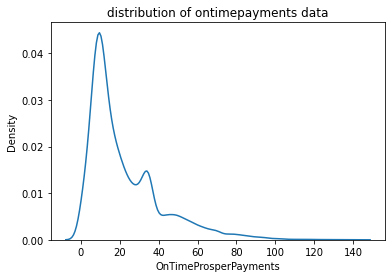

In [56]:
#lets look at ontime prosper loan payments
sb.kdeplot(data = new_df , x = "OnTimeProsperPayments")
plt.title('distribution of ontimepayments data');

From the KDE graph, ontime prosper payments has its highest peak at 10 after which a sharp fall as it increases before 30 where it rose to a lower peak at 35

In [22]:
# let's look at total prosper loans data
new_df['TotalProsperLoans'].value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

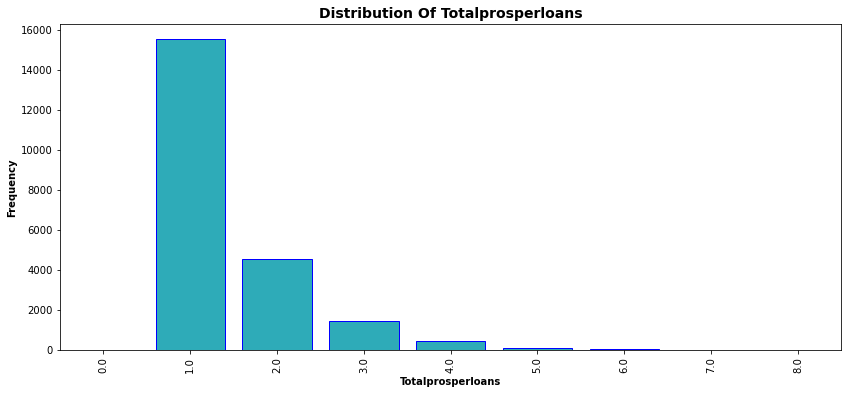

In [43]:
my_countplot(new_df, 'TotalProsperLoans')
plt.xticks(rotation = 90);

The total prosper loans of 1.0 had the highest count and the count decreases as the total prosper loan increases.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I did not observe any unusual points in the distributions of my variables of interest. the data is ok for further analysis


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
There were no unusual distributions in my other distributions. they were easy to understand.


## Bivariate Exploration

To start with, let us look at the relationship between borrower's APR and LenderYield

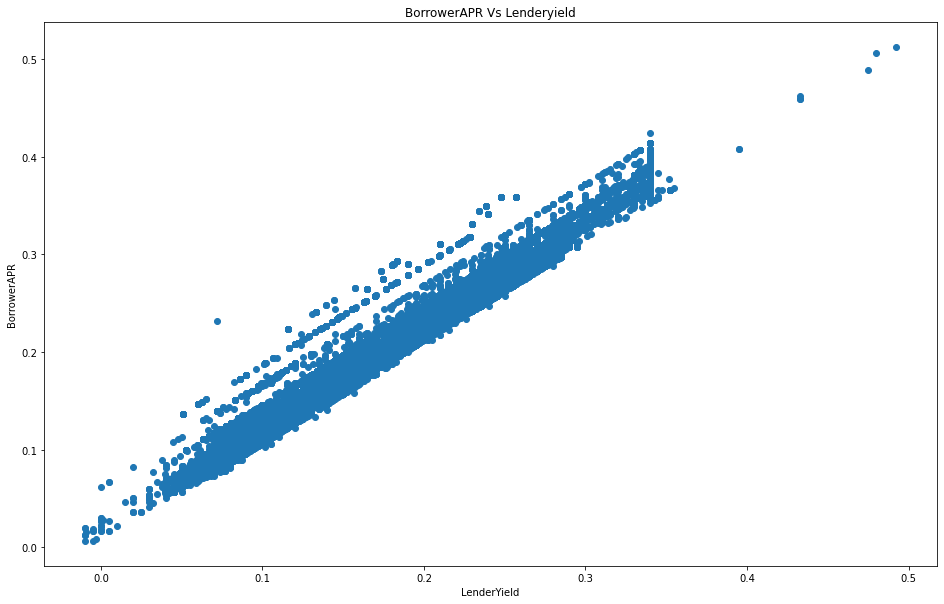

In [57]:
plt.figure(figsize = [16, 10])
plt.scatter(data = new_df, x = 'LenderYield', y = 'BorrowerAPR');
plt.title('BorrowerAPR Vs Lenderyield')
plt.ylabel('BorrowerAPR')
plt.xlabel('LenderYield');

It is observed that there is a positive relationship between the borrower's APR and the lender's Yield. Hence the higher the lender yield, the higher the borrower's APR.

Let's look at the relationship between LoanStatus and the original loan amount 

In [25]:
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

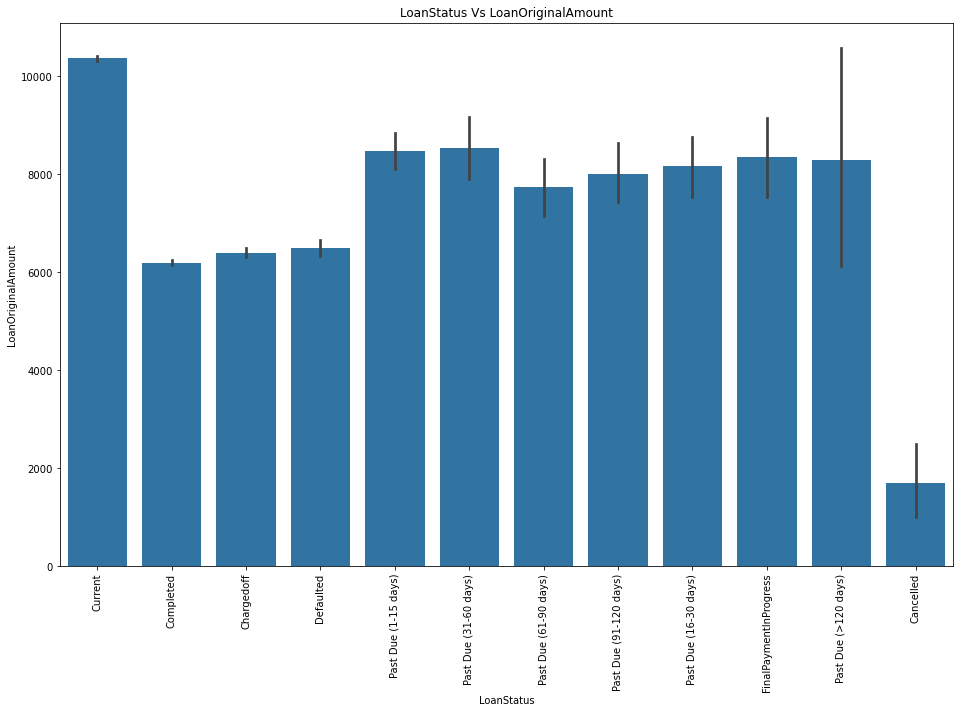

In [58]:
status_classes = ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']


loanstatus = pd.api.types.CategoricalDtype(ordered=True, categories=status_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
new_df['LoanStatus'] = new_df['LoanStatus'].astype(loanstatus);

plt.figure(figsize = [16, 10])
base_color = sb.color_palette()[0]

#box plot

sb.barplot(data=new_df, x='LoanStatus', y='LoanOriginalAmount', color=base_color)
plt.title('LoanStatus Vs LoanOriginalAmount')
plt.xticks(rotation=90);


it can be observed that the 'current' loan status borrowed the highest loan amount compared to the other statuses. the 'cancelled' status had the least amount borrowed. 

In [27]:
#lets look at the employment status against loan original amount
new_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

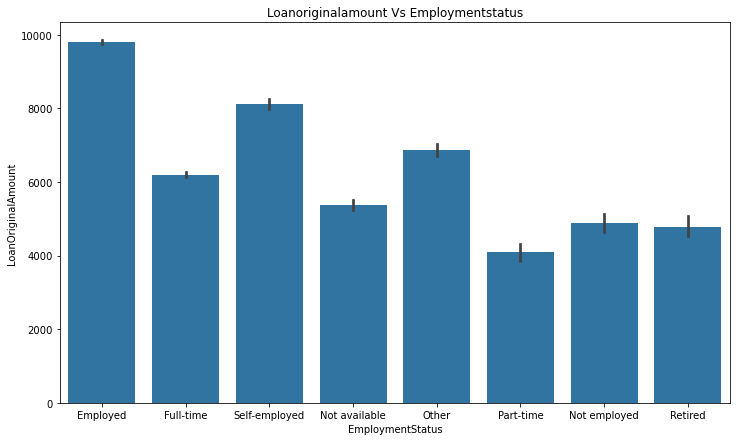

In [59]:
employment_classes = ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired']


employmentstatus = pd.api.types.CategoricalDtype(ordered=True, categories=employment_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].astype(employmentstatus);

plt.figure(figsize = [12, 7])
base_color = sb.color_palette()[0]

sb.barplot(x="EmploymentStatus", y="LoanOriginalAmount", data=new_df, color = base_color)
plt.title('Loanoriginalamount Vs Employmentstatus');


it is observed that the employed status borrowed the highest amount than the others while the part time workers borrowed the lowest amount

Let's look at the relationship between prosper score and lender yield

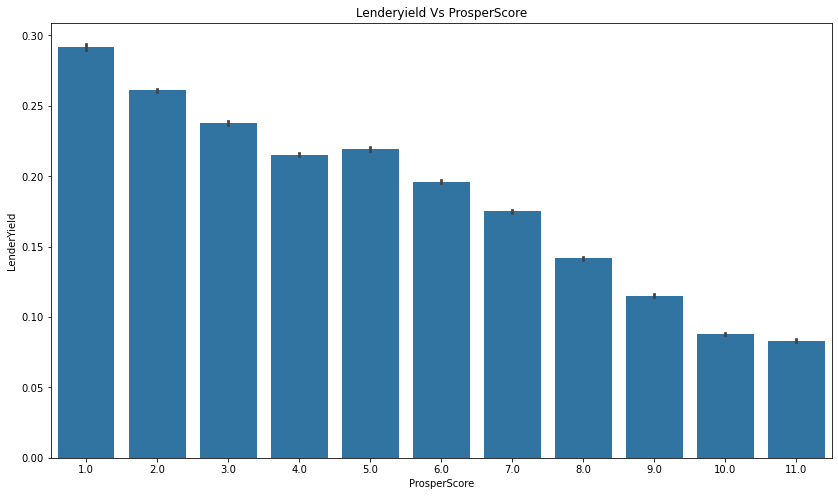

In [60]:
plt.figure(figsize = [14, 8])
sb.barplot(x="ProsperScore", y="LenderYield", data=new_df, color = base_color)
plt.title('Lenderyield Vs ProsperScore');

it is observed that the loans with prosper score of 1.0 had the highest lender yield and the prosper score of 11.0 had the lowest lender yield. 

Let's look at the relationship between loan original amount and monthly loan payments

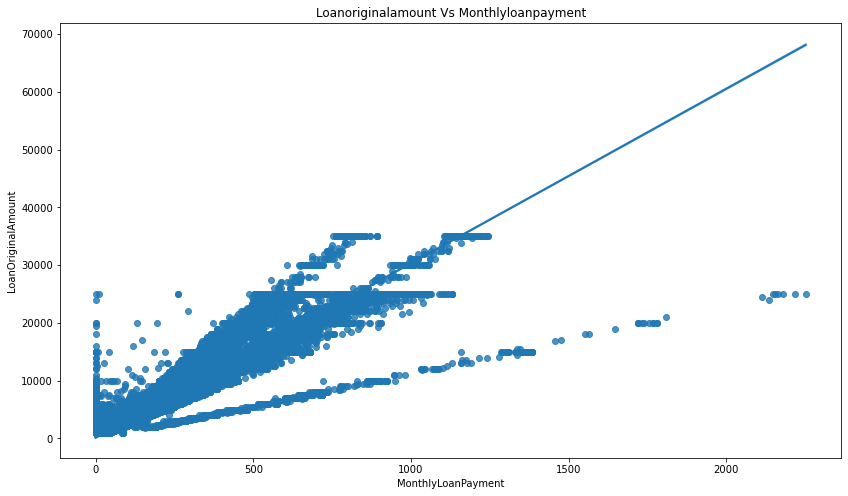

In [61]:
plt.figure(figsize = [14, 8])
sb.regplot(data = new_df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount');
plt.ylabel('LoanOriginalAmount')
plt.xlabel('MonthlyLoanPayment')
plt.title('Loanoriginalamount Vs Monthlyloanpayment');

it can be observed that the monthly loan payment has a positive relationship with original loan amount. that is, the higher the original loan amount, the higher the monthly loan payment.

Let's explore the relationship between total prosper loans and on time prosper payments

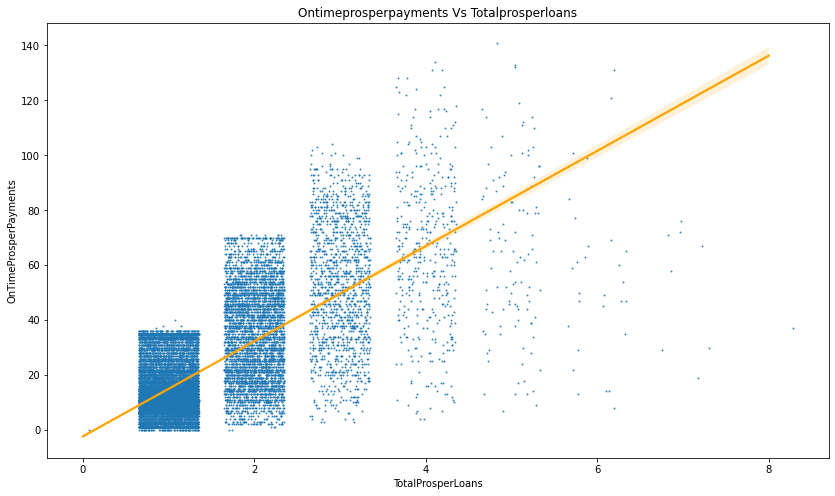

In [62]:
plt.figure(figsize = [14, 8])
sb.regplot(data = new_df, x = 'TotalProsperLoans', y = 'OnTimeProsperPayments', x_jitter=0.35, scatter_kws={'s':1}, line_kws={'color':'orange'});
plt.ylabel('OnTimeProsperPayments')
plt.xlabel('TotalProsperLoans')
plt.title('Ontimeprosperpayments Vs Totalprosperloans');

Total prosper loan has a positive relationship with on time prosper payments. therefore, the higher the total prosper loans, the higher the ontime prosper payments

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I discovered that borrowerAPR has a positive relationship with lender yield

> I discovered the 'current' loan status borrowed the highest loan amount compared to the other statuses. the 'cancelled' status had the least amount borrowed.

> I also noticed that employed status borrowed the highest amount than the others while the part time workers borrowed the lowest amount

> I observed that the loans with prosper score of 1.0 had the highest lender yield while the loan with prosper score of 11, had the lowest lender yield.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


>  it can be observed that the monthly loan payment has a positive relationship with original loan amount. that is, the higher the original loan amount, the higher the monthly loan payment.

> Total prosper loan has a positive relationship with on time prosper payments.

## Multivariate Exploration

Let's see how lender yield relates with borrower APR considering prosper rating 

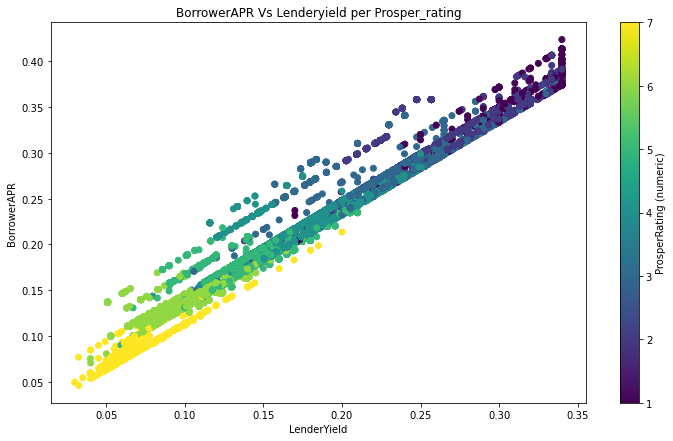

In [63]:
plt.figure(figsize = [12, 7])
plt.scatter(data = new_df, x = 'LenderYield', y = 'BorrowerAPR', c = 'ProsperRating (numeric)');
plt.colorbar(label = 'ProsperRating (numeric)')
plt.ylabel('BorrowerAPR')
plt.xlabel('LenderYield')
plt.title('BorrowerAPR Vs Lenderyield per Prosper_rating');

It is seen that the lower prosper rating i.e 1 - 5, have higher borrowerAPR and corresponding lender yield compared to the higher prosper ratings

lets see how IsBorrowerHomeOwner relates with original loan amount for each employment  status

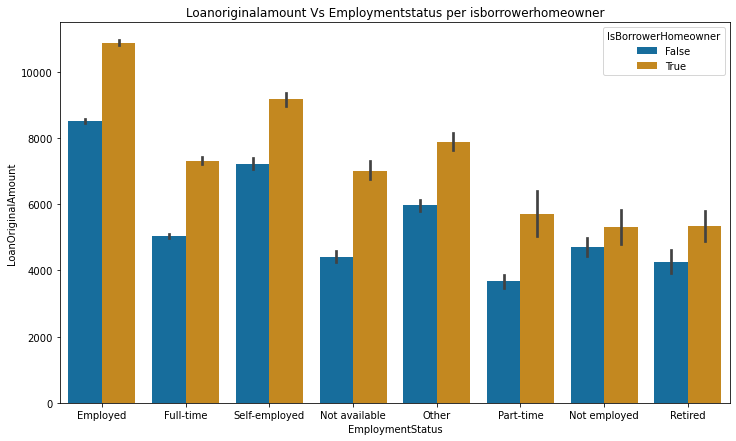

In [64]:
employment_classes = ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired']


employmentstatus = pd.api.types.CategoricalDtype(ordered=True, categories=employment_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].astype(employmentstatus);

plt.figure(figsize = [12, 7])
base_color = sb.color_palette()[0]

sb.barplot(x="EmploymentStatus", y="LoanOriginalAmount", data=new_df, color = base_color, hue = 'IsBorrowerHomeowner', palette = 'colorblind')
plt.title('Loanoriginalamount Vs Employmentstatus per isborrowerhomeowner');

It is observed from the above graph that the borrowers that are home owners borrowed higher amount than those that are not home owners for each employment status.

lets see how monthly loan payments relates with loan original amount per prosper score

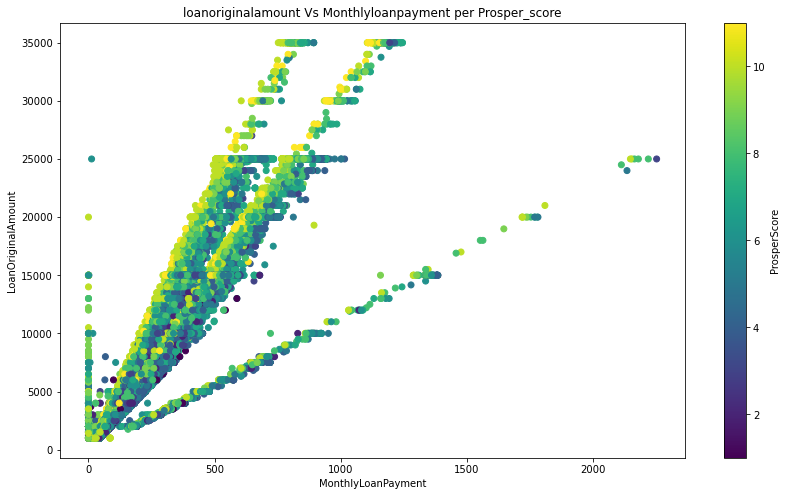

In [65]:
plt.figure(figsize = [14, 8])
plt.scatter(data = new_df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', c = 'ProsperScore');
plt.colorbar(label = 'ProsperScore')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('MonthlyLoanPayment')
plt.title('loanoriginalamount Vs Monthlyloanpayment per Prosper_score');

It can be observed from the chart that the loans with lower prosper score achieved higher monthly loan payments corresponding with high loan original amount compared to the higher prosper scores

lets examine the relationship between prosper score and lender yield for each employment status

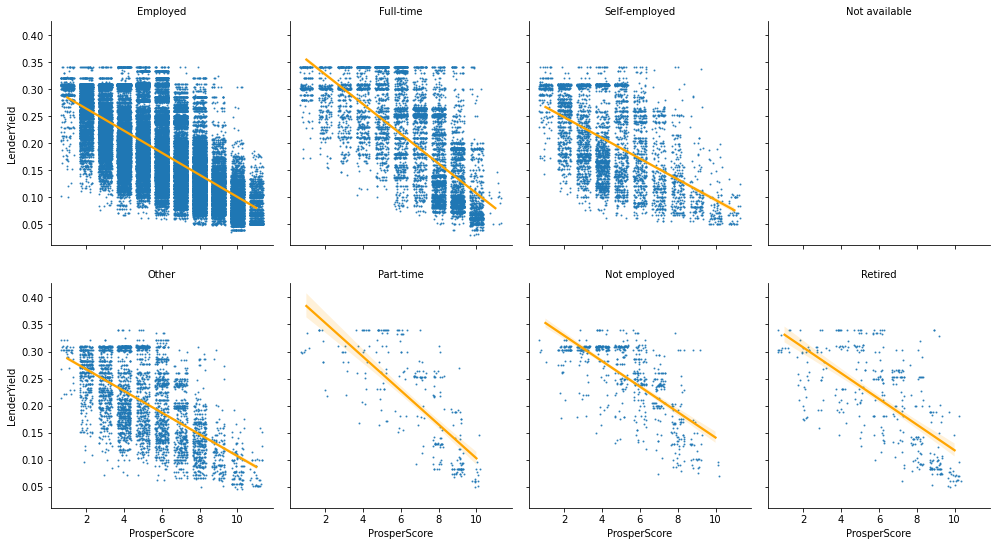

In [67]:
g = sb.FacetGrid(data = new_df , col= "EmploymentStatus" , col_wrap= 4)
g.map(sb.regplot, "ProsperScore", "LenderYield", x_jitter=0.35, scatter_kws={'s':1}, line_kws={'color':'orange'})
g.set_titles("{col_name}");
#set plot dimensions
g.fig.set_size_inches(14,8);

it can be observed that for each of the employment status, prosper score has an inverse relationship with lender yield. The part-time status has the best correlation of all the status because it has the steepest slope. 

lets see the relationship between total prosper loans and ontime prosper payments for each loan status

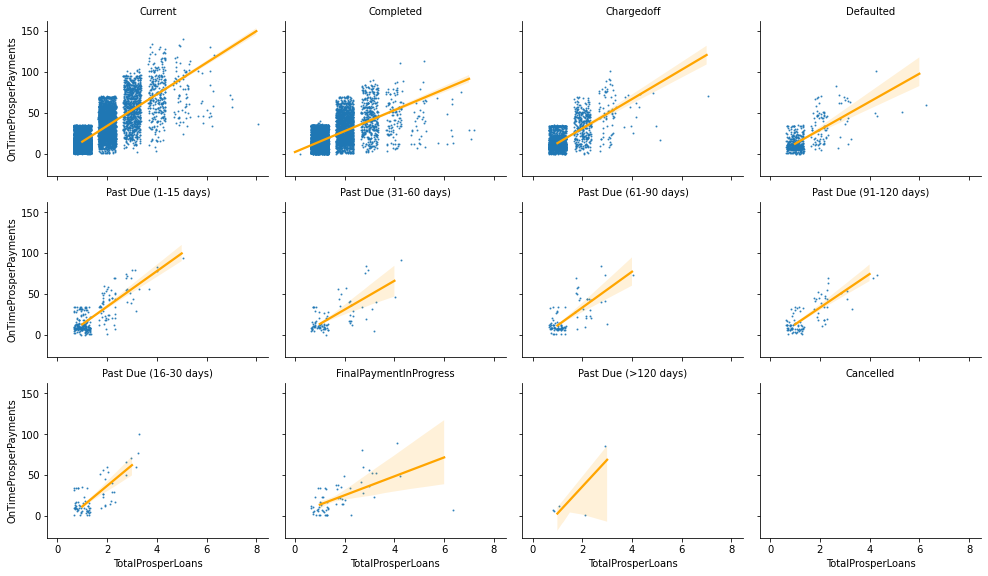

In [69]:
g = sb.FacetGrid(data = new_df , col= "LoanStatus" , col_wrap= 4)
g.map(sb.regplot, "TotalProsperLoans", "OnTimeProsperPayments", x_jitter=0.35, scatter_kws={'s':1}, line_kws={'color':'orange'})
g.set_titles("{col_name}");
#set plot dimensions
g.fig.set_size_inches(14,8);

It is observed that the 'current' loan status has the best correlation between ontime prosper payments and total prosper loans. those whose status is 'cancelled' have no plot at all since they are cancelled. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is seen that the lower prosper rating i.e 1 - 5, have higher borrowerAPR and corresponding lender yield compared to the higher prosper ratings

> it is also observed that the borrowers that are home owners borrowed higher amount than those that are not home owners for each employment status.

> the loans with lower prosper score achieved higher monthly loan payments corresponding with high loan original amount compared to the higher prosper scores

### Were there any interesting or surprising interactions between features?

> for each of the employment status, prosper score has an inverse relationship with lender yield. The part-time status has the best correlation of all the status because it has the steepest slope.

## Conclusions
> From the visualisations above, the following observations and deductions were made.

> borrowerAPR has a positive relationship with lender yield

> the 'current' loan status borrowed the highest loan amount compared to the other statuses. the 'cancelled' status had the least amount borrowed. therefore, loan status is a good determinant of original loan amount

> I also noticed that employed status borrowed the highest amount than the others while the part time workers borrowed the lowest amount. Therefore, employment ststus also can be used as a determinant for the original loan amount.

> I observed that the loans with prosper score of 1.0 had the highest lender yield while the loan with prosper score of 11, had the lowest lender yield. Meaning that prosper score has a negative relationship with lender yield

> monthly loan payment has a positive relationship with original loan amount. that is, the higher the original loan amount, the higher the monthly loan payment.

> Total prosper loan has a positive relationship with on time prosper payments.

> the lower prosper rating i.e 1 - 5, have higher borrowerAPR and corresponding lender yield compared to the higher prosper ratings.

> the borrowers that are home owners borrowed higher amount than those that are not home owners for each employment status.

> the loans with lower prosper score achieved higher monthly loan payments corresponding with high loan original amount compared to the higher prosper scores

> for each of the employment status, prosper score has an inverse relationship with lender yield. The part-time status has the best correlation of all the status because it has the steepest slope.
